<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_0_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.178510,54.835715,-0.201116,163.813109,163.842758,-0.029649
1,0.0,1.0,42.137733,62.913508,-0.433908,114.617333,115.149810,-0.532477
2,0.0,2.0,97.409953,71.402390,0.066042,178.878385,178.645837,0.232548
3,0.0,3.0,47.677597,50.609247,-0.113057,108.173787,108.361596,-0.187808
4,0.0,4.0,96.632510,28.816164,-0.113210,135.335464,135.294773,0.040691
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,69.369222,67.712290,-0.012343,147.069169,147.044651,0.024519
29996,999.0,26.0,31.606215,30.128983,0.166109,71.901306,71.623869,0.277438
29997,999.0,27.0,35.219543,66.065324,-0.842068,110.442799,111.130218,-0.687419
29998,999.0,28.0,68.086541,98.613440,0.367418,177.067399,176.610398,0.457002


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.178510,54.835715,-0.201116,163.813109,163.842758,-0.029649
1,0.0,1.0,42.137733,62.913508,-0.433908,114.617333,115.149810,-0.532477
2,0.0,2.0,97.409953,71.402390,0.066042,178.878385,178.645837,0.232548
3,0.0,3.0,47.677597,50.609247,-0.113057,108.173787,108.361596,-0.187808
4,0.0,4.0,96.632510,28.816164,-0.113210,135.335464,135.294773,0.040691
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,69.369222,67.712290,-0.012343,147.069169,147.044651,0.024519
29996,999.0,26.0,31.606215,30.128983,0.166109,71.901306,71.623869,0.277438
29997,999.0,27.0,35.219543,66.065324,-0.842068,110.442799,111.130218,-0.687419
29998,999.0,28.0,68.086541,98.613440,0.367418,177.067399,176.610398,0.457002


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    99.178510  54.835715 -0.201116  163.813109  163.842758 -0.029649
      1.0    42.137733  62.913508 -0.433908  114.617333  115.149810 -0.532477
      2.0    97.409953  71.402390  0.066042  178.878385  178.645837  0.232548
      3.0    47.677597  50.609247 -0.113057  108.173787  108.361596 -0.187808
      4.0    96.632510  28.816164 -0.113210  135.335464  135.294773  0.040691
...                ...        ...       ...         ...         ...       ...
999.0 25.0   69.369222  67.712290 -0.012343  147.069169  147.044651  0.024519
      26.0   31.606215  30.128983  0.166109   71.901306   71.623869  0.277438
      27.0   35.219543  66.065324 -0.842068  110.442799  111.130218 -0.687419
      28.0   68.086541  98.613440  0.367418  177.067399  176.610398  0.457002
      29.0   28.257780  20.789597  0.142559   59.189937   58.938816  0.251121

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    99.178510  54.835715 -0.201116  163.813109  163.842758 -0.029649
      1.0    42.137733  62.913508 -0.433908  114.617333  115.149810 -0.532477
      2.0    97.409953  71.402390  0.066042  178.878385  178.645837  0.232548
      3.0    47.677597  50.609247 -0.113057  108.173787  108.361596 -0.187808
      4.0    96.632510  28.816164 -0.113210  135.335464  135.294773  0.040691
...                ...        ...       ...         ...         ...       ...
999.0 25.0   69.369222  67.712290 -0.012343  147.069169  147.044651  0.024519
      26.0   31.606215  30.128983  0.166109   71.901306   71.623869  0.277438
      27.0   35.219543  66.065324 -0.842068  110.442799  111.130218 -0.687419
      28.0   68.086541  98.613440  0.367418  177.067399  176.610398  0.457002
      29.0   28.257780  20.789597  0.142559   59.189937   58.938816  0.251121

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.178510,54.835715,-0.201116,163.813109,163.842758,-0.029649
1,0.0,1.0,42.137733,62.913508,-0.433908,114.617333,115.149810,-0.532477
2,0.0,2.0,97.409953,71.402390,0.066042,178.878385,178.645837,0.232548
3,0.0,3.0,47.677597,50.609247,-0.113057,108.173787,108.361596,-0.187808
4,0.0,4.0,96.632510,28.816164,-0.113210,135.335464,135.294773,0.040691
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,69.369222,67.712290,-0.012343,147.069169,147.044651,0.024519
29996,999.0,26.0,31.606215,30.128983,0.166109,71.901306,71.623869,0.277438
29997,999.0,27.0,35.219543,66.065324,-0.842068,110.442799,111.130218,-0.687419
29998,999.0,28.0,68.086541,98.613440,0.367418,177.067399,176.610398,0.457002


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    99.178510  54.835715 -0.201116  163.813109  163.842758 -0.029649
      1.0    42.137733  62.913508 -0.433908  114.617333  115.149810 -0.532477
      2.0    97.409953  71.402390  0.066042  178.878385  178.645837  0.232548
      3.0    47.677597  50.609247 -0.113057  108.173787  108.361596 -0.187808
      4.0    96.632510  28.816164 -0.113210  135.335464  135.294773  0.040691
...                ...        ...       ...         ...         ...       ...
999.0 25.0   69.369222  67.712290 -0.012343  147.069169  147.044651  0.024519
      26.0   31.606215  30.128983  0.166109   71.901306   71.623869  0.277438
      27.0   35.219543  66.065324 -0.842068  110.442799  111.130218 -0.687419
      28.0   68.086541  98.613440  0.367418  177.067399  176.610398  0.457002
      29.0   28.257780  20.789597  0.142559   59.189937   58.938816  0.251121

[30000 rows x 6 columns]

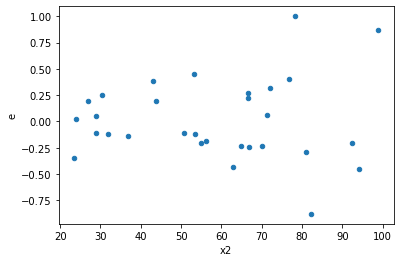

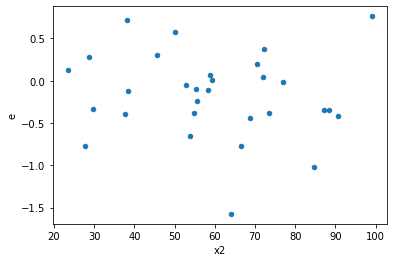

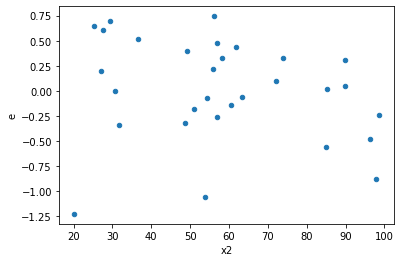

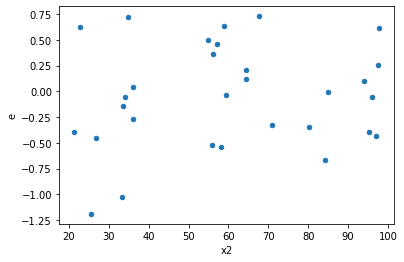

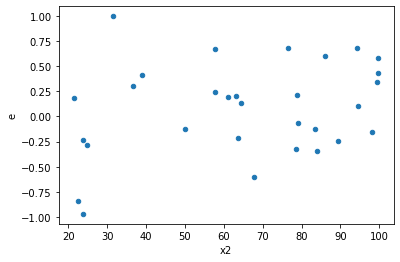

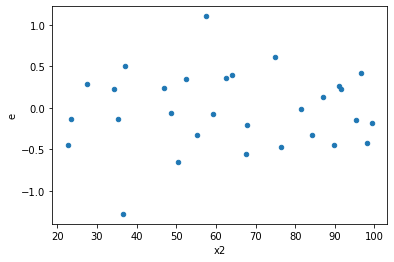

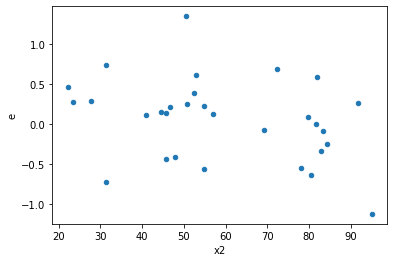

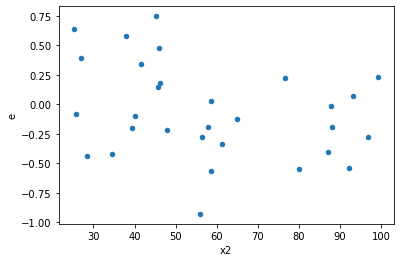

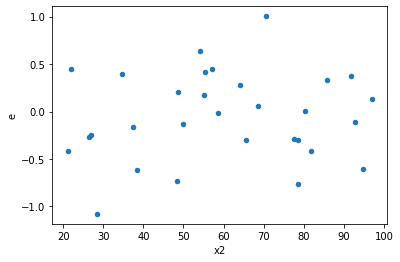

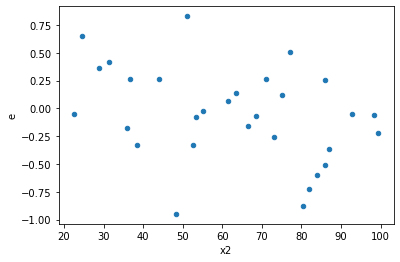

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,10.0,1.1588047563531831,1.3616870729491704,0.11588047563531831,0.13616870729491704,1.1750789470647913,0.8036127108173805,0.5981936445913097,0.40180635540869025,Reject001=1 : Homoscedasticity
1.0,10.0,10.0,1.302378959509472,2.2740381787421935,0.1302378959509472,0.22740381787421934,1.7460648931234939,0.3929817519944985,0.8035091240027508,0.19649087599724924,Reject001=1 : Homoscedasticity
12.0,10.0,10.0,1.3565855567014635,2.013148910873228,0.13565855567014634,0.2013148910873228,1.4839822677813244,0.5439641263779504,0.7280179368110248,0.2719820631889752,Reject001=1 : Homoscedasticity
17.0,10.0,10.0,1.9797163761501397,2.080859077964855,0.19797163761501396,0.20808590779648548,1.0510894909155637,0.9387525044006102,0.5306237477996949,0.4693762522003051,Reject001=1 : Homoscedasticity
19.0,10.0,10.0,0.9022866830999476,2.6594080105941917,0.09022866830999476,0.2659408010594192,2.9474091332672425,0.10313413052329756,0.9484329347383512,0.05156706526164878,Reject001=1 : Homoscedasticity
21.0,10.0,10.0,2.252879157104987,2.324469235128144,0.2252879157104987,0.23244692351281443,1.031777149607595,0.9615233002544232,0.5192383498727884,0.4807616501272116,Reject001=1 : Homoscedasticity
27.0,10.0,10.0,1.3992629968672214,1.5364395017544337,0.13992629968672216,0.15364395017544336,1.0980348263295274,0.885341938220785,0.5573290308896075,0.4426709691103925,Reject001=1 : Homoscedasticity
34.0,10.0,10.0,0.9004457759049207,1.5422839933957144,0.09004457759049207,0.15422839933957144,1.7128005202154075,0.4093227012060163,0.7953386493969918,0.20466135060300816,Reject001=1 : Homoscedasticity
35.0,10.0,10.0,0.766970698454437,0.9100838514873841,0.0766970698454437,0.09100838514873841,1.186595333200267,0.7920191715045362,0.6039904142477319,0.3960095857522681,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,1.1588047563531831,1.3616870729491704,0.11588047563531831,0.13616870729491704,1.1750789470647913,0.8036127108173805,Reject001=1 : Homoscedasticity
1.0,10.0,10.0,1.302378959509472,2.2740381787421935,0.1302378959509472,0.22740381787421934,1.7460648931234939,0.3929817519944985,Reject001=1 : Homoscedasticity
2.0,10.0,10.0,4.447354925772631,1.1700026162431625,0.4447354925772631,0.11700026162431625,0.26307830964039824,0.04643713301749092,Reject001=1 : Homoscedasticity
3.0,10.0,10.0,2.521798210430575,1.5684986136068337,0.25217982104305753,0.15684986136068338,0.621976257703437,0.4660057735139963,Reject001=1 : Homoscedasticity
4.0,10.0,10.0,2.3867229521247237,1.6661346843463112,0.23867229521247238,0.16661346843463112,0.6980846615913565,0.5803767997202472,Reject001=1 : Homoscedasticity
5.0,10.0,10.0,4.114099782270191,1.060060172511712,0.41140997822701914,0.1060060172511712,0.25766515850686605,0.04333820988473791,Reject001=1 : Homoscedasticity
6.0,10.0,10.0,1.849188792211107,1.8086367825960716,0.1849188792211107,0.18086367825960717,0.9780703788678351,0.9727216055861438,Reject001=1 : Homoscedasticity
7.0,10.0,10.0,1.4215344872639082,1.3724787417115782,0.14215344872639082,0.13724787417115783,0.965490991606718,0.9568099689466106,Reject001=1 : Homoscedasticity
8.0,10.0,10.0,2.445433973979549,2.206109859923567,0.2445433973979549,0.2206109859923567,0.902134297387502,0.8738294438098314,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      984
Reject001=0 : Heteroscedasticity     16
Name: Result_test, dtype: int64